<a href="https://colab.research.google.com/github/Yamito548/Proyectos-peque-os/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En esta actividad usaremos modelos de tensorflow para hacer diferentes tareas.

# Importamos librerías

In [ ]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tlf
import tensorflow as tf
from tensorflow.keras import layers, models
!pip install tensorflowjs
import tensorflowjs as tfjs
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Tarea 1

(4 Puntos) Realiza la tarea de implementar un modelo para convertir temperaturas de grados
Fahrenheit a centígrados. Expórtalo a Tensorflow.js e implementa la aplicación web para que
use el modelo.

Descargo la función de conversión y genero el dataset

In [ ]:
#Función para pasar de fahrenheit a celsius
def convertirTemperaturas(fahrenheit):
  #Formula para la conversión
  return (fahrenheit -32) * 5/9

#Creamos el dataset
with open('temperaturas.csv', mode="w",newline="") as file:
  writer = csv.writer(file)
  writer.writerow(["Fahrenheit","Celsius"])
  for fahrenheit in range(-100,1001):
    celcius = convertirTemperaturas(fahrenheit)
    writer.writerow([fahrenheit,celcius])

#Vemos el dataset
data = pd.read_csv("temperaturas.csv")
data

,Fahrenheit,Celsius
0,-100,-73.333333
1,-99,-72.777778
2,-98,-72.222222
3,-97,-71.666667
4,-96,-71.111111
...,...,...
1096,996,535.555556
1097,997,536.111111
1098,998,536.666667
1099,999,537.222222


Creamos una función en donde convertimos temperaturas desde fahrenheit a celsius. Para luego crear un dataset con 1101 muestras de ambas temperaturas.

Dividimos los datos en train, test y validación.

In [ ]:
#Hacemos la división, 80% para train (-5% para validación) y 20% para test
train_data, test_data = train_test_split(data, test_size=0.20, random_state=100)
train_data, val_data = train_test_split(data, test_size=0.05, random_state=100)

#Guardamos los conjuntos de datos en archivos csv
train_data.to_csv("train_data.csv",index=False)
test_data.to_csv("test_data.csv", index=False)
val_data.to_csv("val_data.csv", index=False)

Como se ve en el código, lo dividimos en 3 conjutos y creamos para cada conjunto un archivo .csv.

Entrenamos modelo con tensorflow

In [ ]:
#Definimos el modelo.
modelo = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

#Compilamos el modelo.
modelo.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

entrenamiento = modelo.fit(train_data['Fahrenheit'],train_data['Celsius'],
                           validation_data=(val_data['Fahrenheit'],val_data['Celsius']),epochs=100,batch_size=32)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 53741.0508 - mae: 178.3834 - val_loss: 253.8230 - val_mae: 15.6007
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 577.7101 - mae: 22.5647 - val_loss: 112.4508 - val_mae: 9.1477
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 112.2128 - mae: 9.0945 - val_loss: 91.7618 - val_mae: 7.6592
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82.1816 - mae: 7.4074 - val_loss: 88.1671 - val_mae: 7.5938
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77.0760 - mae: 7.3140 - val_loss: 88.4838 - val_mae: 7.5317
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 77.5085 - mae: 7.3626 - val_loss: 87.6580 - val_mae: 7.5716
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.7772 - mae: 7.4266 - val_loss: 87.5656 - val_mae: 7.5415
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 76.4819 - mae: 7.2764 - val_loss: 87.2143 - val_mae: 7.5408
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

Entrenamos el modelo durante 100 épocas y podemos ver el MSE se ha reducido muchisimo. Casi llegando a 0. Este modelo es sencillo, debido a que también lo que estamos haciendo no es muy complicado y no tiene muchos datos.

Exportamos el modelo que acabamos de crear

In [ ]:
#Exportamos el modelo a tensorflow.js
tfjs.converters.save_keras_model(modelo, 'modelo')

failed to lookup keras version from the file,
    this is likely a weight only file


Gráfica de pérdida

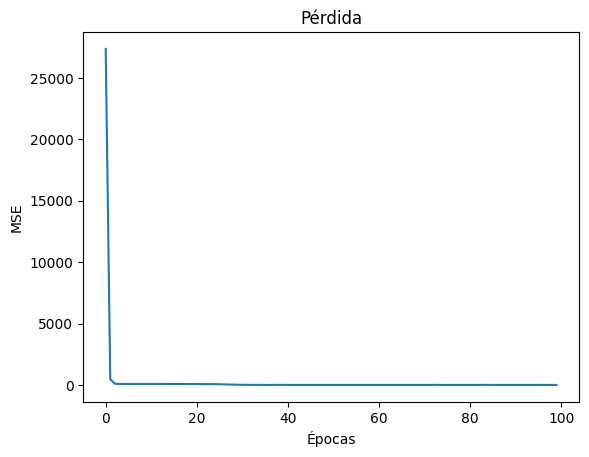

In [ ]:
plt.plot(entrenamiento.history['loss'])
plt.title("Pérdida")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.show()

Vemos básicamente un gráfico que recuerda a una "L". Vemos que empieza con mucha pérdida, pero poco a poco va bajando hasta llegar casi a 0.

Gráfica de acierto

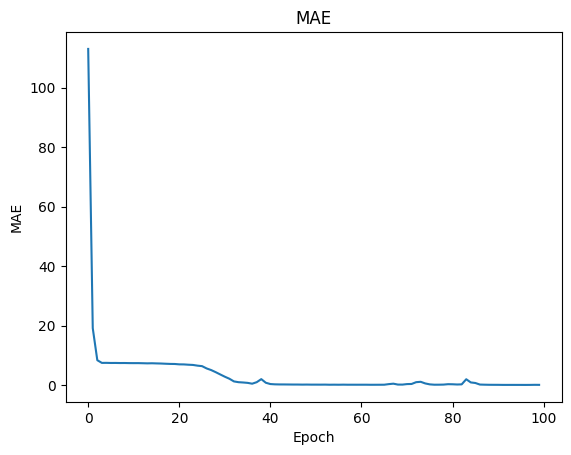

In [ ]:
plt.plot(entrenamiento.history['mae'])
plt.title('MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()

Y aquí esta el acierto o mejor dicho el MAE, el cual vemos que varía más que el de perdida. LLegando tambíen a números cercanos a 0, siendo muy bueno ya que a más cerca del 0 esté, mejor será el modelo.

# Tarea 2

Para esta tarea, deberemos y a kaggle y descargar el siguiente [dataset](https://www.kaggle.com/datasets/imsparsh/flowers-dataset?resource=download). Y deberemos implementar en Python el modelo de red convolucional que clasifique correctamente las flores, deberemos expórtalo y úsalo en una aplicación web en la que se seleccionará una imagen e indicará su nombre. Para este caso, he los datasets estan cargados en mi github, ya en el documento de la actividad explicaré como pude subir las carpetas y archivos, que tiene su miga.

In [ ]:
#Definimos modelo de red convolucional
modelo = models.Sequential([
      layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(5, activation='softmax')
  ])
modelo.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       3,211,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,267,973 (12.47 MB)

 Trainable params: 3,267,973 (12.47 MB)

 Non-trainable params: 0 (0.00 B)

Datos desde mi drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Traemos los datos de train de mi drive, estas estan almacenadas en subcarpertas con el nombre de las clases de flor las cuales son 5:

    daisy
    dandelion
    rose
    sunflower
    tulip


In [ ]:
train_images = "drive/MyDrive/datasets/train"
ruta = []
#Recorremos las carpetas que tienen las imágenes
for dirname, _, filenames in os.walk(train_images):
  for filename in filenames:
    ruta.append(os.path.join(dirname,filename))

#Creamos el dataset
train = pd.DataFrame(ruta, columns=["Imagen"])
train

,Imagen
0,drive/MyDrive/datasets/train/dandelion/1821557...
1,drive/MyDrive/datasets/train/dandelion/1702996...
2,drive/MyDrive/datasets/train/dandelion/1736786...
3,drive/MyDrive/datasets/train/dandelion/1942657...
4,drive/MyDrive/datasets/train/dandelion/1474035...
...,...
2741,drive/MyDrive/datasets/train/tulip/8686332852_...
2742,drive/MyDrive/datasets/train/tulip/8713392604_...
2743,drive/MyDrive/datasets/train/tulip/8603340662_...
2744,drive/MyDrive/datasets/train/tulip/8712263493_...


Ahora haré lo mismo pero esta vez lo haré para los datos test

In [ ]:
test_images = "drive/MyDrive/datasets/test"
ruta_2 = []
#Recorremos las carpetas que tienen las imágenes
for filename in os.listdir(test_images):
    # Construimos la ruta completa de la imagen
    image_path = os.path.join(test_images, filename)
    # Añadimos la ruta al listado
    ruta_2.append(image_path)

#Creamos el dataset
test = pd.DataFrame(ruta_2, columns=["Imagen"])
test

,Imagen
0,drive/MyDrive/datasets/test/Image_100.jpg
1,drive/MyDrive/datasets/test/Image_101.jpg
2,drive/MyDrive/datasets/test/Image_106.jpg
3,drive/MyDrive/datasets/test/Image_1.jpg
4,drive/MyDrive/datasets/test/Image_103.jpg
...,...
929,drive/MyDrive/datasets/test/Image_915.jpg
930,drive/MyDrive/datasets/test/Image_93.jpg
931,drive/MyDrive/datasets/test/Image_919.jpg
932,drive/MyDrive/datasets/test/Image_90.jpg


Vemos un ejemplo del dataset que acabamos de crear.

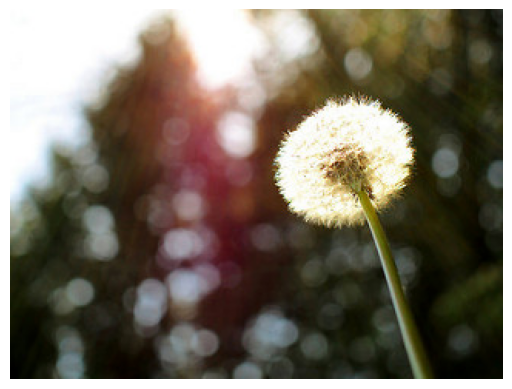

In [ ]:
# Obtener la ruta de la primera imagen del DataFrame
imagen_path = train.iloc[1]["Imagen"]

# Leer la imagen utilizando OpenCV
imagen = cv2.imread(imagen_path)

# Convertir la imagen de BGR a RGB.
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Mostrar la imagen utilizando matplotlib
plt.imshow(imagen_rgb)
plt.axis('off')
plt.show()

También sacamos las etiquetas que se encuentran en la carpeta de train.

In [ ]:
clases_dataset = []

for paths in train["Imagen"]:
  m=paths.split('/')
  if len(m) <=8:
    for i in range(len(m)):
      if m[i] == 'train':
        clases_dataset.append(m[i+1])
clases_dataset = pd.DataFrame(clases_dataset, columns=['Categoría'])
clases_dataset

,Categoría
0,dandelion
1,dandelion
2,dandelion
3,dandelion
4,dandelion
...,...
2741,tulip
2742,tulip
2743,tulip
2744,tulip


Combinamos tanto la ruta de la imagen como su categoría.

In [ ]:
train = pd.concat([train,clases_dataset], axis=1)
train

,Imagen,Categoría
0,drive/MyDrive/datasets/train/dandelion/1821557...,dandelion
1,drive/MyDrive/datasets/train/dandelion/1702996...,dandelion
2,drive/MyDrive/datasets/train/dandelion/1736786...,dandelion
3,drive/MyDrive/datasets/train/dandelion/1942657...,dandelion
4,drive/MyDrive/datasets/train/dandelion/1474035...,dandelion
...,...,...
2741,drive/MyDrive/datasets/train/tulip/8686332852_...,tulip
2742,drive/MyDrive/datasets/train/tulip/8713392604_...,tulip
2743,drive/MyDrive/datasets/train/tulip/8603340662_...,tulip
2744,drive/MyDrive/datasets/train/tulip/8712263493_...,tulip


Comprobamos que solo hay 5 tipos de flor.

In [ ]:
tipos_categoria = train["Categoría"].unique()
tipos_categoria

array(['dandelion', 'rose', 'daisy', 'sunflower', 'tulip'], dtype=object)

Podemos comprobar lo que ya había dicho, que solo hay 5 categorías.

Dividimos los datos

In [ ]:
#Dividimos los datos
y = train["Categoría"]
y

0       dandelion
1       dandelion
2       dandelion
3       dandelion
4       dandelion
          ...    
2741        tulip
2742        tulip
2743        tulip
2744        tulip
2745        tulip
Name: Categoría, Length: 2746, dtype: object

Todo esto solo lo hago para que me sea más sencillo de aplicar y entender.

El siguiente paso sería el de convertir la columna de categorías en valores númericos, para que el modelo los pueda usar correctamente.

In [ ]:
#Convertir clases_dataset a valores númericos
encoder = LabelEncoder()
y = encoder.fit_transform(y)
label = encoder.fit_transform(clases_dataset["Categoría"].unique())
code = dict(zip(label,clases_dataset["Categoría"].unique()))
code

{1: 'dandelion', 2: 'rose', 0: 'daisy', 3: 'sunflower', 4: 'tulip'}

Ahora, lo que habrá que hacer es ajustar las imágenes a un tamaño común. En este caso será de 128x128.

In [ ]:
#Ahora vamos a procesar las imágenes para su uso en python
from PIL import Image
X = []
for path in train["Imagen"]:
  Imagen = Image.open(path)
  nueva_imagen = np.array(Imagen)
  X.append(nueva_imagen)

In [ ]:
print(f"Vemos la cantidad de valores que tiene la X: {len(X)}")
print(f"Vemos la cantidad de valores que tiene la y: {len(y)}")

Vemos la cantidad de valores que tiene la X: 2746
Vemos la cantidad de valores que tiene la y: 2746


In [ ]:
# Lista auxiliar para almacenar las imágenes redimensionadas con dimensiones correctas
X_redimensionado = []
# Redimensionar las imágenes y eliminar aquellas con dimensiones incorrectas
for i in range(len(X)):
    imagen_redimensionada = cv2.resize(X[i], (128, 128)) #128,128
    forma_redimensionada = imagen_redimensionada.shape
    # Verificar si la forma de la imagen redimensionada es diferente a (128,128, 3)
    if forma_redimensionada == (128,128, 3):
        X_redimensionado.append(imagen_redimensionada)

# Convertir la lista de imágenes redimensionadas con dimensiones correctas a una matriz NumPy
X = np.stack(X_redimensionado)
len(X)

2746

In [ ]:
#Normalizamos los datos, para que tengan valores entre 0 y 1.
X= X/255

Vamos terminar y entrenar el modelo

In [ ]:
#Compilamos el modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=100, shuffle=True)
modelo.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=32,shuffle=True, epochs = 10)
# modelo.fit(X, y, epochs=10)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9499 - loss: 0.1897 - val_accuracy: 0.5873 - val_loss: 2.2756
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9880 - loss: 0.0364 - val_accuracy: 0.5545 - val_loss: 2.7125
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9836 - loss: 0.0502 - val_accuracy: 0.5618 - val_loss: 2.6299
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9941 - loss: 0.0231 - val_accuracy: 0.5418 - val_loss: 2.9275
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.9783 - loss: 0.0657 - val_accuracy: 0.5400 - val_loss: 2.3323
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9843 - loss: 0.0534 - val_accuracy: 0.5745 - val_loss: 2.3418
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9988 - loss: 0.0095 - val_accuracy: 0.5545 - val_loss: 3.2227
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9957 - loss: 0.0171 - val_accuracy: 0.5436 - val_loss

Aquí podemos ver que el entrenamiento a priori a sido un bueno, con un accuracy  alto tanto en el **accuracy** como en el **val_accuracy**. Cosa que es una buena señal, pero tocará hacer una prueba para ver si es realmente real esto.

Prueba de clasificación de imágenes

In [ ]:
#Evaluamos el modelo
loss, accuracy = modelo.evaluate(X_test,y_test)
print(f"La precisión final con los datos de test es de: {round(accuracy,2)}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.5814 - loss: 2.8831
La precisión final con los datos de test es de: 0.59


No es tan alto como el que vimos antes, pero sigue siendo muy alto para un modelo. Para este en concreto creo que esta más que bien y no creo que sea necesario mejorarlo mucho más ya que solo es un clasificador de flores, si fuese algo con más importancia o que una mala clasificación llevase a problemas graves ahí si que lo intentaría mejorar lo máximo posible, pero no lo veo necesario.

In [ ]:
#Realizamos una predición
predict = modelo.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 329ms/step


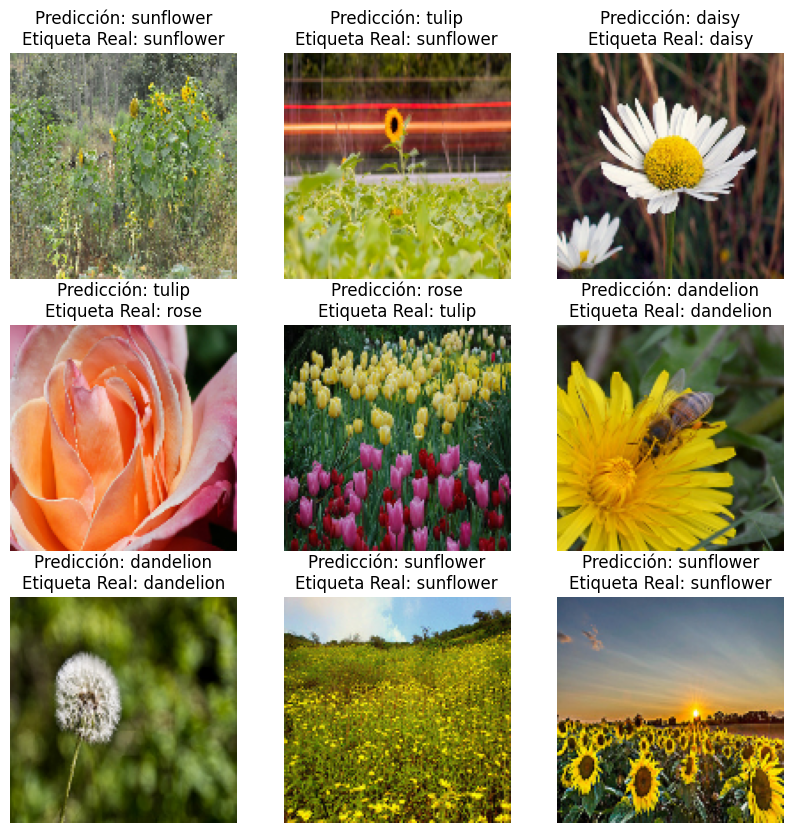

In [ ]:
import random
#Mostramos algunas predicciones junto con las etiquetas reales
plt.figure(figsize=(10, 10))
# Obtener 9 índices aleatorios de las imágenes de prueba
random_indices = random.sample(range(len(X_test)), 9)

# Mostrar las imágenes aleatorias junto con sus predicciones y etiquetas reales
for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx])
    plt.title("Predicción: {}\nEtiqueta Real: {}".format(code[np.argmax(predict[idx])], code[y_test[idx]]))
    plt.axis('off')
plt.show()